In [1]:
# Imports
import numpy as np

from rich import print as pprint
from panoptica import (
    InputType,
    Panoptica_Evaluator,
    ConnectedComponentsInstanceApproximator,
    NaiveThresholdMatching,
    HungryMatching,
)

# Simple Binary Example 

## With 0.5 Threshold

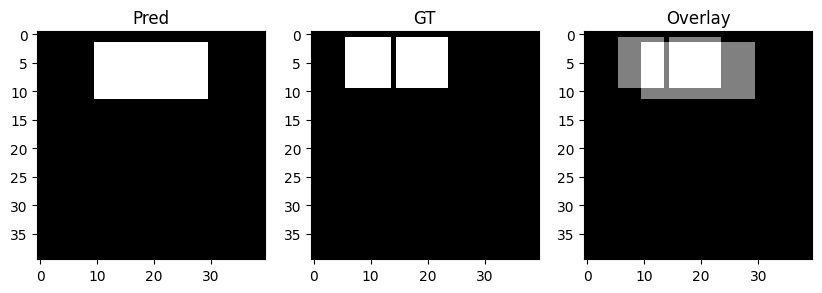

In [2]:
# Create empty arrays
pred = np.zeros((40, 40))
gt = np.zeros((40, 40))

# Reference objects (ground truth)
gt[1:10, 6:14] = 1
gt[1:10, 15:24] = 1

pred[2:12, 10:30] = 1

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(pred, cmap="gray")
ax[0].set_title("Pred")
ax[1].imshow(gt, cmap="gray")
ax[1].set_title("GT")
ax[2].imshow(pred + gt, cmap="gray")
ax[2].set_title("Overlay")
plt.show()

In [3]:
# Convert pred and gt to integer type AFTER assignment
pred = pred.astype(np.int32)
gt = gt.astype(np.int32)

# NAIVE Matching
naive_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=NaiveThresholdMatching(matching_threshold=0.5),
)

print("Naive Matching")
result = naive_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

# HUNGRY Matching
hungry_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=HungryMatching(matching_threshold=0.5),
)
print("\nHungry Matching")
result = hungry_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

Naive Matching
ref_label: 2, pred_label: 1, matching_score: 0.3444976076555024
ref_label: 1, pred_label: 1, matching_score: 0.13333333333333333


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 1
True Positives (tp): 0
False Positives (fp): 1
False Negatives (fn): 2
Recognition Quality / F1-Score (rq): 0.0

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.5892351274787535

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.0 +- nan
Panoptic Quality IoU (pq): 0.0
Segmentation Quality Dsc (sq_dsc): 0.0 +- nan
Panoptic Quality Dsc (pq_dsc): 0.0
Segmentation Quality ASSD (sq_assd): inf +- nan
Segmentation Quality Relative Volume Difference (sq_rvd): nan +- nan


Hungry Matching


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 1
True Positives (tp): 0
False Positives (fp): 1
False Negatives (fn): 2
Recognition Quality / F1-Score (rq): 0.0

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.5892351274787535

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.0 +- nan
Panoptic Quality IoU (pq): 0.0
Segmentation Quality Dsc (sq_dsc): 0.0 +- nan
Panoptic Quality Dsc (pq_dsc): 0.0
Segmentation Quality ASSD (sq_assd): inf +- nan
Segmentation Quality Relative Volume Difference (sq_rvd): nan +- nan

## With 0.0 Threshold

In [4]:
# Convert pred and gt to integer type AFTER assignment
pred = pred.astype(np.int32)
gt = gt.astype(np.int32)

# NAIVE Matching
naive_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=NaiveThresholdMatching(matching_threshold=0.0),
)

print("Naive Matching")
result = naive_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

# HUNGRY Matching
hungry_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=HungryMatching(matching_threshold=0.0),
)
print("\nHungry Matching")
result = hungry_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

Naive Matching
ref_label: 2, pred_label: 1, matching_score: 0.3444976076555024


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 1
True Positives (tp): 1
False Positives (fp): 0
False Negatives (fn): 1
Recognition Quality / F1-Score (rq): 0.6666666666666666

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.5892351274787535

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.3444976076555024 +- 0.0
Panoptic Quality IoU (pq): 0.22966507177033493
Segmentation Quality Dsc (sq_dsc): 0.5124555160142349 +- 0.0
Panoptic Quality Dsc (pq_dsc): 0.3416370106761566
Segmentation Quality ASSD (sq_assd): 2.6724199253921057 +- 0.0
Segmentation Quality Relative Volume Difference (sq_rvd): 1.4691358024691359 +- 0.0


Hungry Matching
ref_label: 2, pred_label: 1, matching_score: 0.3444976076555024
ref_label: 1, pred_label: 1, matching_score: 0.13333333333333333


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 1
True Positives (tp): 1
False Positives (fp): 0
False Negatives (fn): 1
Recognition Quality / F1-Score (rq): 0.6666666666666666

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.5892351274787535

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.3444976076555024 +- 0.0
Panoptic Quality IoU (pq): 0.22966507177033493
Segmentation Quality Dsc (sq_dsc): 0.5124555160142349 +- 0.0
Panoptic Quality Dsc (pq_dsc): 0.3416370106761566
Segmentation Quality ASSD (sq_assd): 2.6724199253921057 +- 0.0
Segmentation Quality Relative Volume Difference (sq_rvd): 1.4691358024691359 +- 0.0

# "Complex" Binary Example

## Notice the difference between the panoptic quality scores

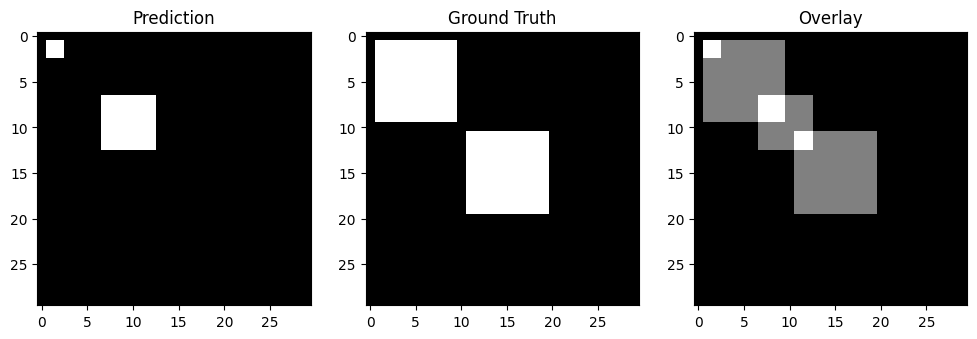

In [5]:
# Create empty arrays
pred = np.zeros((30, 30))
gt = np.zeros((30, 30))

# Ground truth
gt[1:10, 1:10] = 1
gt[11:20, 11:20] = 1

# Prediction
pred[1:3, 1:3] = 1
pred[7:13, 7:13] = 1

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].imshow(pred, cmap="gray")
ax[0].set_title("Prediction")
ax[1].imshow(gt, cmap="gray")
ax[1].set_title("Ground Truth")
ax[2].imshow(pred + gt, cmap="gray")
ax[2].set_title("Overlay")
plt.show()

## With 0.0 Threshold 

In [6]:
# Convert pred and gt to integer type AFTER assignment
pred = pred.astype(np.int32)
gt = gt.astype(np.int32)

# NAIVE Matching
naive_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=NaiveThresholdMatching(matching_threshold=0.0),
)

print("Naive Matching")
result = naive_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

# HUNGRY Matching
hungry_evaluator = Panoptica_Evaluator(
    expected_input=InputType.SEMANTIC,
    instance_approximator=ConnectedComponentsInstanceApproximator(),
    instance_matcher=HungryMatching(matching_threshold=0.0),
)
print("\nHungry Matching")
result = hungry_evaluator.evaluate(pred, gt, verbose=False)["ungrouped"]
pprint(result)

Naive Matching
ref_label: 1, pred_label: 2, matching_score: 0.08333333333333333


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 2
True Positives (tp): 1
False Positives (fp): 1
False Negatives (fn): 1
Recognition Quality / F1-Score (rq): 0.5

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.16831683168316833

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.08333333333333333 +- 0.0
Panoptic Quality IoU (pq): 0.041666666666666664
Segmentation Quality Dsc (sq_dsc): 0.15384615384615385 +- 0.0
Panoptic Quality Dsc (pq_dsc): 0.07692307692307693
Segmentation Quality ASSD (sq_assd): 3.437567298243609 +- 0.0
Segmentation Quality Relative Volume Difference (sq_rvd): -0.5555555555555556 +- 0.0


Hungry Matching
ref_label: 1, pred_label: 2, matching_score: 0.08333333333333333
ref_label: 1, pred_label: 1, matching_score: 0.04938271604938271
ref_label: 2, pred_label: 2, matching_score: 0.035398230088495575


+++ MATCHING +++
Number of instances in reference (num_ref_instances): 2
Number of instances in prediction (num_pred_instances): 2
True Positives (tp): 2
False Positives (fp): 0
False Negatives (fn): 0
Recognition Quality / F1-Score (rq): 1.0

+++ GLOBAL +++
Global Binary Dice (global_bin_dsc): 0.16831683168316833

+++ INSTANCE +++
Segmentation Quality IoU (sq): 0.042390473068939144 +- 0.006992242980443569
Panoptic Quality IoU (pq): 0.042390473068939144
Segmentation Quality Dsc (sq_dsc): 0.08124685771744596 +- 0.012870789341377573
Panoptic Quality Dsc (pq_dsc): 0.08124685771744596
Segmentation Quality ASSD (sq_assd): 3.587180022257517 +- 0.7184042176340859
Segmentation Quality Relative Volume Difference (sq_rvd): -0.7530864197530864 +- 0.19753086419753085